work nomber 2

In [130]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50


In [131]:
import pandas as pd
from glob import glob
import seaborn as sns
import random
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop,Adam
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import datetime
from sklearn.metrics import classification_report, confusion_matrix

In [132]:
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random as rd
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix , precision_score,recall_score
import seaborn as sns

In [133]:
import keras
from keras import optimizers
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from keras.layers import Activation
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

In [134]:
train=(r'C:\nataly\deep learning\chest_xray\train')
val=(r'C:\nataly\deep learning\chest_xray\val')
test=(r'C:\nataly\deep learning\chest_xray\test')

train_normal=(r'C:\nataly\deep learning\chest_xray\train\NORMAL')
train_pneumonia=(r'C:\nataly\deep learning\chest_xray\train\PNEUMONIA')
val_normal=(r'C:\nataly\deep learning\chest_xray\val\NORMAL')
val_pneumonia=(r'C:\nataly\deep learning\chest_xray\val\PNEUMONIA')

In [135]:
training_data_num1=ImageDataGenerator(rescale=1.0/255,
                                 rotation_range=45,
                                 width_shift_range=0.3,
                                 height_shift_range=0.4,
                                 zoom_range=0.4,
                                 )

validation_data_num1=ImageDataGenerator(rescale=1.0/255)

test_data_num1=ImageDataGenerator(rescale=1.0/255)

train_images  = (r'C:\nataly\deep learning\chest_xray\train')
validation_images= (r'C:\nataly\deep learning\chest_xray\val')




train_data = tf.keras.utils.image_dataset_from_directory(
    train_images, seed=3, validation_split=0.1, subset='training')
    
validation_Data = tf.keras.utils.image_dataset_from_directory(
    train_images, seed=3, validation_split=0.1, subset='validation')


train_generator_num1=training_data_num1.flow_from_directory(train,target_size=(180,180),batch_size=64,class_mode='binary')

val_generator_num1=validation_data_num1.flow_from_directory(val,target_size=(180,180),batch_size=64,class_mode='binary')

test_generator_num1=test_data_num1.flow_from_directory(test,target_size=(180,180),batch_size=64,class_mode='binary')

Found 5216 files belonging to 2 classes.
Using 4695 files for training.
Found 5216 files belonging to 2 classes.
Using 521 files for validation.
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# part 1

# ResNet50

In [136]:
from tensorflow.keras import datasets, layers, models, losses, Model

In [138]:
model_num1 = tf.keras.applications.ResNet50(weights='imagenet',
                                         include_top=False,
                                         input_shape=(180,180,3))

model_num1.trainable=False
        
model_num1.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 186, 186, 3)  0           ['input_7[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 90, 90, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 90, 90, 64)   256         ['conv1_conv[0][0]']      

In [139]:
for layer in model_num1.layers:
      if layer.name == 'conv5_block3_3_conv' or layer.name == 'conv5_block3_2_conv':
        layer.trainable = True

In [140]:
model_num1.get_config()

C:\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


{'name': 'resnet50',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 180, 180, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_7'},
   'name': 'input_7',
   'inbound_nodes': []},
  {'class_name': 'ZeroPadding2D',
   'config': {'name': 'conv1_pad',
    'trainable': False,
    'dtype': 'float32',
    'padding': ((3, 3), (3, 3)),
    'data_format': 'channels_last'},
   'name': 'conv1_pad',
   'inbound_nodes': [[['input_7', 0, 0, {}]]]},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv1_conv',
    'trainable': False,
    'dtype': 'float32',
    'filters': 64,
    'kernel_size': (7, 7),
    'strides': (2, 2),
    'padding': 'valid',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'linear',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}

In [141]:
last_layer = model_num1.get_layer('conv5_block3_out')
last_output = last_layer.output

x= layers.Flatten()(last_output)
x= layers.Dense(128,activation='relu')(x)
x= layers.Dropout(0.2)(x)
x= layers.Dense(64,activation='relu')(x)
x= layers.Dropout(0.2)(x)                
x= layers.Dense(1,activation='sigmoid')(x)           

model1 = Model(model_num1.input, x) 

model1.summary()

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 186, 186, 3)  0           ['input_7[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 90, 90, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 90, 90, 64)   256         ['conv1_conv[0][0]']      

In [143]:
batch_size = 16
epochs = 20
lr = 1e-4
adam = tf.keras.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.95)

model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])

In [144]:
history_num1=model1.fit(train_generator_num1 ,validation_data=val_generator_num1 ,epochs=epochs, verbose=2)

Epoch 1/20
82/82 - 282s - loss: 0.5997 - accuracy: 0.7268 - val_loss: 0.7527 - val_accuracy: 0.5000 - 282s/epoch - 3s/step
Epoch 2/20
82/82 - 247s - loss: 0.5561 - accuracy: 0.7418 - val_loss: 0.7215 - val_accuracy: 0.5000 - 247s/epoch - 3s/step
Epoch 3/20
82/82 - 260s - loss: 0.5008 - accuracy: 0.7452 - val_loss: 0.6877 - val_accuracy: 0.5000 - 260s/epoch - 3s/step
Epoch 4/20
82/82 - 275s - loss: 0.4763 - accuracy: 0.7450 - val_loss: 0.7291 - val_accuracy: 0.5000 - 275s/epoch - 3s/step
Epoch 5/20
82/82 - 258s - loss: 0.4579 - accuracy: 0.7661 - val_loss: 0.6632 - val_accuracy: 0.6875 - 258s/epoch - 3s/step
Epoch 6/20
82/82 - 278s - loss: 0.4400 - accuracy: 0.7776 - val_loss: 0.7396 - val_accuracy: 0.5625 - 278s/epoch - 3s/step
Epoch 7/20
82/82 - 262s - loss: 0.4366 - accuracy: 0.7837 - val_loss: 0.6481 - val_accuracy: 0.6250 - 262s/epoch - 3s/step
Epoch 8/20
82/82 - 279s - loss: 0.4307 - accuracy: 0.7928 - val_loss: 0.6927 - val_accuracy: 0.6250 - 279s/epoch - 3s/step
Epoch 9/20
82/82

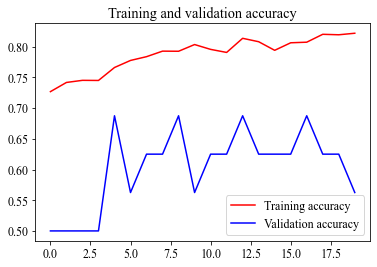

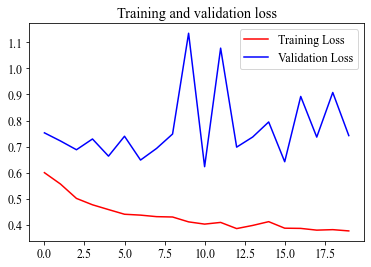

In [145]:
acc_Num1 = history_num1.history['accuracy']
val_Num1 = history_num1.history['val_accuracy']


loss_Num1 = history_num1.history['loss']
val_loss_Num1 = history_num1.history['val_loss']
epochs = range(len(acc_Num1))

plt.plot(epochs, acc_Num1, 'r', label='Training accuracy')
plt.plot(epochs, val_Num1, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()


plt.plot(epochs, loss_Num1, 'r', label='Training Loss')
plt.plot(epochs, val_loss_Num1, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


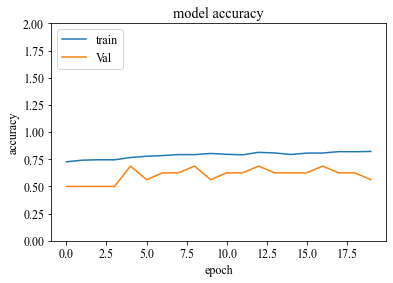

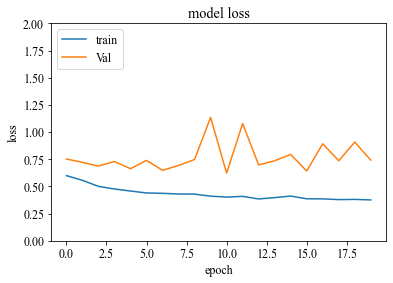

In [146]:
print(history_num1.history.keys())
plt.plot(history_num1.history['accuracy'])
plt.plot(history_num1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.ylim(0,2)

plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')

plt.show()
plt.plot(history_num1.history['loss'])
plt.plot(history_num1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.ylim(0,2)
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')

plt.show()

In [147]:
result_model1 = model1.evaluate_generator(test_generator_num1, 156)
print('loss  :', result_model_Num1[0])
print('accuracy  :', result_model_Num1[1])

C:\Users\natal\AppData\Local\Temp/ipykernel_13900/881476028.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  result_model1 = model1.evaluate_generator(test_generator_num1, 156)


loss  : 0.5804184675216675
accuracy  : 0.6570512652397156


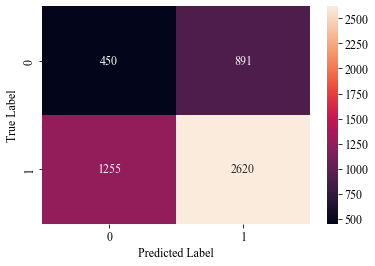

In [148]:
predictions_ResNet50 = model1.predict(train_generator_num1) 

y_pred = predictions_ResNet50 > 0.5
y_true = train_generator_num1.classes 

import seaborn as sns

font = {
    'family': 'Times New Roman',
    'size': 12
}
plt.rc('font', **font)
mat = confusion_matrix(y_true, y_pred)
sns.heatmap(mat, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [149]:
import sklearn.metrics

#Recall = TruePositives / (TruePositives + FalseNegatives)
#precision = TruePositives/(TruePositives+FalsePositives)

recall = sklearn.metrics.recall_score(y_true, y_pred, pos_label=1)
print(" The recall of model is:" ,recall)

precision = sklearn.metrics.precision_score(y_true, y_pred, pos_label=1)
print("The precision of the model is:" ,precision)

 The recall of model is: 0.6761290322580645
The precision of the model is: 0.7462261463970379


# DenseNet 121

In [150]:
from tensorflow.keras import datasets, layers,losses, Model

In [151]:
train_generator_Num2 = train_generator_num1
val_generator_Num2   = val_generator_num1
test_generator_Num2  = test_generator_num1

In [153]:
model_num2 =  tf.keras.applications.DenseNet121(weights='imagenet',
                                         include_top=False,
                                         input_shape=(180,180,3))

model_num2.trainable=False
        
model_num2.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_10 (ZeroPadding  (None, 186, 186, 3)  0          ['input_8[0][0]']                
 2D)                                                                                              
                                                                                                  
 conv1/conv (Conv2D)            (None, 90, 90, 64)   9408        ['zero_padding2d_10[0][0]']      
                                                                                        

In [154]:
for layer in model_num2.layers:
      if layer.name == 'conv5_block16_2_conv' or layer.name == 'conv5_block16_1_conv ':
        layer.trainable = True

In [155]:
model_num2.get_config()

{'name': 'densenet121',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 180, 180, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_8'},
   'name': 'input_8',
   'inbound_nodes': []},
  {'class_name': 'ZeroPadding2D',
   'config': {'name': 'zero_padding2d_10',
    'trainable': False,
    'dtype': 'float32',
    'padding': ((3, 3), (3, 3)),
    'data_format': 'channels_last'},
   'name': 'zero_padding2d_10',
   'inbound_nodes': [[['input_8', 0, 0, {}]]]},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv1/conv',
    'trainable': False,
    'dtype': 'float32',
    'filters': 64,
    'kernel_size': (7, 7),
    'strides': (2, 2),
    'padding': 'valid',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'linear',
    'use_bias': False,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': '

In [157]:
last_layer = model_num2.get_layer('relu')
last_output = last_layer.output

x= layers.Flatten()(last_output)
x= layers.Dense(128,activation='relu')(x)
x= layers.Dropout(0.2)(x)
x= layers.Dense(64,activation='relu')(x)
x= layers.Dropout(0.2)(x)                
x= layers.Dense(1,activation='sigmoid')(x)          

model2 = Model(model_num2.input, x) 

model2.summary()

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_10 (ZeroPadding  (None, 186, 186, 3)  0          ['input_8[0][0]']                
 2D)                                                                                              
                                                                                                  
 conv1/conv (Conv2D)            (None, 90, 90, 64)   9408        ['zero_padding2d_10[0][0]']      
                                                                                           

In [159]:
batch_size = 16
epochs = 20
lr = 1e-4
adam = tf.keras.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.95)

model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])

In [160]:
history_num2 = model2.fit(train_generator_Num2,validation_data=val_generator_Num2, epochs=epochs,verbose=2)

Epoch 1/20
82/82 - 233s - loss: 0.4182 - accuracy: 0.8207 - val_loss: 0.4567 - val_accuracy: 0.8125 - 233s/epoch - 3s/step
Epoch 2/20
82/82 - 233s - loss: 0.2651 - accuracy: 0.8901 - val_loss: 0.3650 - val_accuracy: 0.8125 - 233s/epoch - 3s/step
Epoch 3/20
82/82 - 241s - loss: 0.2374 - accuracy: 0.9039 - val_loss: 0.3061 - val_accuracy: 0.9375 - 241s/epoch - 3s/step
Epoch 4/20
82/82 - 242s - loss: 0.2169 - accuracy: 0.9084 - val_loss: 0.2416 - val_accuracy: 0.9375 - 242s/epoch - 3s/step
Epoch 5/20
82/82 - 241s - loss: 0.2132 - accuracy: 0.9149 - val_loss: 0.2746 - val_accuracy: 0.8750 - 241s/epoch - 3s/step
Epoch 6/20
82/82 - 248s - loss: 0.2013 - accuracy: 0.9176 - val_loss: 0.2403 - val_accuracy: 0.9375 - 248s/epoch - 3s/step
Epoch 7/20
82/82 - 239s - loss: 0.2019 - accuracy: 0.9208 - val_loss: 0.3031 - val_accuracy: 0.8750 - 239s/epoch - 3s/step
Epoch 8/20
82/82 - 243s - loss: 0.1903 - accuracy: 0.9247 - val_loss: 0.2613 - val_accuracy: 0.8750 - 243s/epoch - 3s/step
Epoch 9/20
82/82

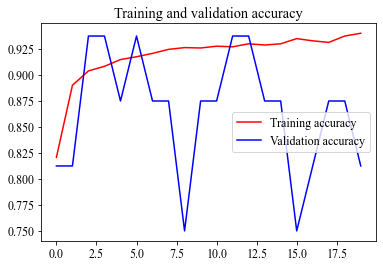

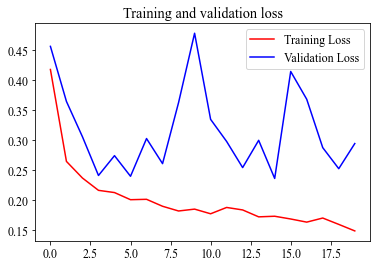

In [161]:
acc_num2 = history_num2.history['accuracy']
val_num2 = history_num2.history['val_accuracy']

loss_num2 = history_num2.history['loss']
val_loss_num2 = history_num2.history['val_loss']
epochs = range(len(acc_num2))

plt.plot(epochs, acc_num2, 'r', label='Training accuracy')
plt.plot(epochs, val_num2, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()


plt.plot(epochs, loss_num2, 'r', label='Training Loss')
plt.plot(epochs, val_loss_num2, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


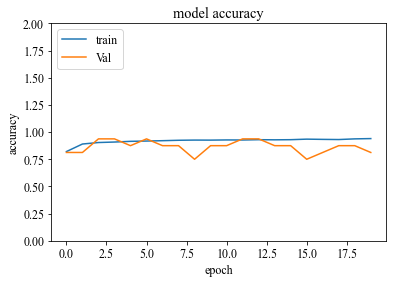

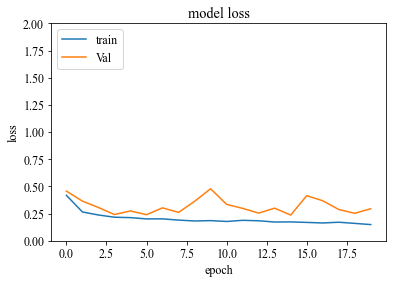

In [162]:
print(history_num2.history.keys())
plt.plot(history_num2.history['accuracy'])
plt.plot(history_num2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.ylim(0,2)

plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')

plt.show()
plt.plot(history_num2.history['loss'])
plt.plot(history_num2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.ylim(0,2)
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')

plt.show()

In [163]:
result_model2 = model2.evaluate_generator(test_generator_Num2, 156)
print('loss  :', result_model2[0])
print('accuracy :', result_model2[1])

C:\Users\natal\AppData\Local\Temp/ipykernel_13900/3769650047.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  result_model2 = model2.evaluate_generator(test_generator_Num2, 156)


loss  : 0.2851954698562622
accuracy : 0.879807710647583


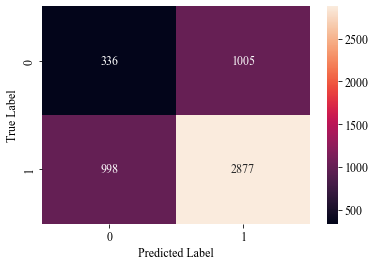

In [164]:
predictions_DenseNet121 = model2.predict(train_generator_Num2) 

y_pred = predictions_DenseNet121 > 0.5
y_true = train_generator_Num2.classes 

import seaborn as sns

font = {
    'family': 'Times New Roman',
    'size': 12
}
plt.rc('font', **font)
mat = confusion_matrix(y_true, y_pred)
sns.heatmap(mat, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [165]:
import sklearn.metrics

#Recall = TruePositives / (TruePositives + FalseNegatives)
#precision = TruePositives/(TruePositives+FalsePositives)

recall = sklearn.metrics.recall_score(y_true, y_pred, pos_label=1)
print(" The recall of model is:" ,recall)

precision = sklearn.metrics.precision_score(y_true, y_pred, pos_label=1)
print("The precision of the model is:" ,precision)

 The recall of model is: 0.7424516129032258
The precision of the model is: 0.741112828438949


# part 2

# ResNet50

In [8]:
from tensorflow.keras import datasets, layers, models, losses, Model

In [11]:
model__num1 = keras.applications.ResNet50(weights='imagenet',
                                         include_top=False,
                                         input_shape=(180,180,3))

model__num1.trainable=False #freeze the model layers
        
model__num1.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 186, 186, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 90, 90, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 90, 90, 64)   256         ['conv1_conv[0][0]']      

In [12]:
for layer in model__num1.layers:
      if layer.name == 'conv3_block2_2_conv' or layer.name == 'conv3_block2_1_conv':
        layer.trainable = True

In [13]:
model__num1.get_config()

C:\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


{'name': 'resnet50',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 180, 180, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'name': 'input_1',
   'inbound_nodes': []},
  {'class_name': 'ZeroPadding2D',
   'config': {'name': 'conv1_pad',
    'trainable': False,
    'dtype': 'float32',
    'padding': ((3, 3), (3, 3)),
    'data_format': 'channels_last'},
   'name': 'conv1_pad',
   'inbound_nodes': [[['input_1', 0, 0, {}]]]},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv1_conv',
    'trainable': False,
    'dtype': 'float32',
    'filters': 64,
    'kernel_size': (7, 7),
    'strides': (2, 2),
    'padding': 'valid',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'linear',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}

In [31]:
last_layer = model__num1.get_layer('relu')
last_output = last_layer.output

x= layers.Flatten()(last_output)
x= layers.Dense(128,activation='relu')(x)
x= layers.Dropout(0.2)(x)
x= layers.Dense(64,activation='relu')(x)
x= layers.Dropout(0.2)(x)                
x= layers.Dense(1,activation='sigmoid')(x)           

model = Model(model__num1.input, x) 

model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 186, 186, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 90, 90, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 90, 90, 64)   256         ['conv1_conv[0][0]']       

In [32]:
batch_size = 16
epochs = 20
lr = 1e-4
adam = keras.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.95)

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])

In [33]:
history_Num1=model.fit(train_generator_num1 ,validation_data=val_generator_num1 ,epochs=epochs, verbose=2)

Epoch 1/20
82/82 - 519s - loss: 0.7323 - accuracy: 0.6653 - val_loss: 0.7749 - val_accuracy: 0.5000 - 519s/epoch - 6s/step
Epoch 2/20
82/82 - 549s - loss: 0.6187 - accuracy: 0.7151 - val_loss: 0.7773 - val_accuracy: 0.5000 - 549s/epoch - 7s/step
Epoch 3/20
82/82 - 531s - loss: 0.5927 - accuracy: 0.7266 - val_loss: 0.8114 - val_accuracy: 0.5000 - 531s/epoch - 6s/step
Epoch 4/20
82/82 - 535s - loss: 0.5828 - accuracy: 0.7398 - val_loss: 0.7900 - val_accuracy: 0.5000 - 535s/epoch - 7s/step
Epoch 5/20
82/82 - 860s - loss: 0.5758 - accuracy: 0.7396 - val_loss: 0.7859 - val_accuracy: 0.5000 - 860s/epoch - 10s/step
Epoch 6/20
82/82 - 522s - loss: 0.5707 - accuracy: 0.7414 - val_loss: 0.7433 - val_accuracy: 0.5000 - 522s/epoch - 6s/step
Epoch 7/20
82/82 - 664s - loss: 0.5646 - accuracy: 0.7437 - val_loss: 0.7579 - val_accuracy: 0.5000 - 664s/epoch - 8s/step
Epoch 8/20
82/82 - 569s - loss: 0.5597 - accuracy: 0.7441 - val_loss: 0.8256 - val_accuracy: 0.5000 - 569s/epoch - 7s/step
Epoch 9/20
82/8

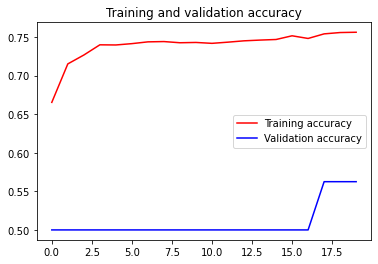

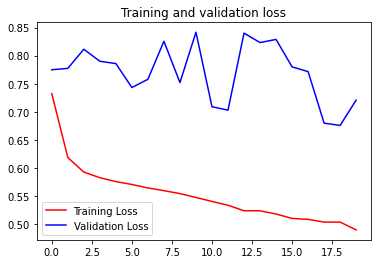

In [37]:
acc_Num1 = history_Num1.history['accuracy']
val_Num1 = history_Num1.history['val_accuracy']


loss_Num1 = history_Num1.history['loss']
val_loss_Num1 = history_Num1.history['val_loss']
epochs = range(len(acc_Num1))

plt.plot(epochs, acc_Num1, 'r', label='Training accuracy')
plt.plot(epochs, val_Num1, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()


plt.plot(epochs, loss_Num1, 'r', label='Training Loss')
plt.plot(epochs, val_loss_Num1, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


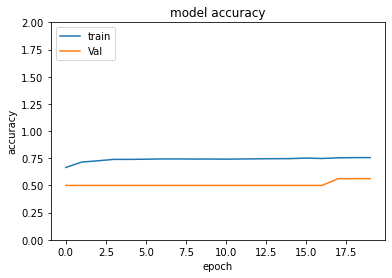

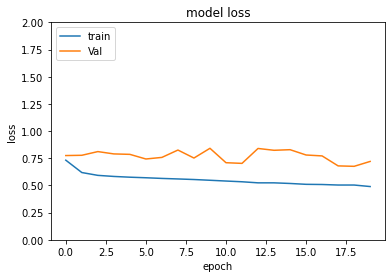

In [38]:
print(history_Num1.history.keys())
plt.plot(history_Num1.history['accuracy'])
plt.plot(history_Num1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.ylim(0,2)

plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')

plt.show()
plt.plot(history_Num1.history['loss'])
plt.plot(history_Num1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.ylim(0,2)
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')

plt.show()

In [41]:
result_model_Num1 = model.evaluate_generator(test_generator_num1, 156)
print('loss  :', result_model_Num1[0])
print('accuracy  :', result_model_Num1[1])

C:\Users\natal\AppData\Local\Temp/ipykernel_13900/1854833516.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  result_model_Num1 = model.evaluate_generator(test_generator_num1, 156)


loss  : 0.5804184675216675
accuracy  : 0.6570512652397156


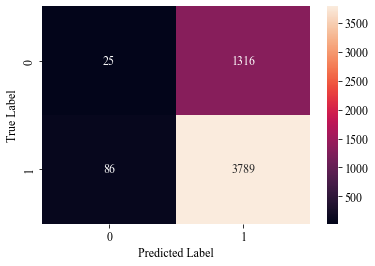

In [43]:
predictions_ResNet50 = model.predict(train_generator_num1) 

y_pred = predictions_ResNet50 > 0.5
y_true = train_generator_num1.classes 

import seaborn as sns

font = {
    'family': 'Times New Roman',
    'size': 12
}
plt.rc('font', **font)
mat = confusion_matrix(y_true, y_pred)
sns.heatmap(mat, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [44]:
import sklearn.metrics

#Recall = TruePositives / (TruePositives + FalseNegatives)
#precision = TruePositives/(TruePositives+FalsePositives)

recall = sklearn.metrics.recall_score(y_true, y_pred, pos_label=1)
print(" The recall of model is:" ,recall)

precision = sklearn.metrics.precision_score(y_true, y_pred, pos_label=1)
print("The precision of the model is:" ,precision)

 The recall of model is: 0.9778064516129032
The precision of the model is: 0.7422135161606268


# DenseNet 121

In [45]:
from tensorflow.keras import datasets, layers,losses, Model

In [46]:
train_generator_Num2 = train_generator_num1
val_generator_Num2   = val_generator_num1
test_generator_Num2  = test_generator_num1

In [47]:
model_Num2 =  keras.applications.DenseNet121(weights='imagenet',
                                         include_top=False,
                                         input_shape=(180,180,3))

model_Num2.trainable=False #freeze the model layers
        
model_Num2.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 186, 186, 3)  0          ['input_2[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 90, 90, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 90, 90, 64)   256         ['conv1/conv[0][0]']   

In [49]:
for layer in model_Num2.layers:
      if layer.name == 'conv4_block17_2_conv' or layer.name == 'conv4_block17_1_conv ':
        layer.trainable = True

In [50]:
model_Num2.get_config()

{'name': 'densenet121',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 180, 180, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_2'},
   'name': 'input_2',
   'inbound_nodes': []},
  {'class_name': 'ZeroPadding2D',
   'config': {'name': 'zero_padding2d',
    'trainable': False,
    'dtype': 'float32',
    'padding': ((3, 3), (3, 3)),
    'data_format': 'channels_last'},
   'name': 'zero_padding2d',
   'inbound_nodes': [[['input_2', 0, 0, {}]]]},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv1/conv',
    'trainable': False,
    'dtype': 'float32',
    'filters': 64,
    'kernel_size': (7, 7),
    'strides': (2, 2),
    'padding': 'valid',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'linear',
    'use_bias': False,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros'

In [52]:
last_layer = model_Num2.get_layer('relu')
last_output = last_layer.output

x= layers.Flatten()(last_output)
x= layers.Dense(128,activation='relu')(x)
x= layers.Dropout(0.2)(x)
x= layers.Dense(64,activation='relu')(x)
x= layers.Dropout(0.2)(x)                
x= layers.Dense(1,activation='sigmoid')(x)          

model2 = Model(model_Num2.input, x) 

model2.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 186, 186, 3)  0          ['input_2[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 90, 90, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 90, 90, 64)   256         ['conv1/conv[0][0]']       

In [53]:
batch_size = 16
epochs = 20
lr = 1e-4
adam = keras.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.95)

model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])

In [54]:
history_Num2 = model2.fit(train_generator_Num2,validation_data=val_generator_Num2, epochs=epochs,verbose=2)

Epoch 1/20
82/82 - 310s - loss: 0.4035 - accuracy: 0.8194 - val_loss: 0.2965 - val_accuracy: 0.8750 - 310s/epoch - 4s/step
Epoch 2/20
82/82 - 310s - loss: 0.2528 - accuracy: 0.8980 - val_loss: 0.2978 - val_accuracy: 0.8125 - 310s/epoch - 4s/step
Epoch 3/20
82/82 - 3269s - loss: 0.2245 - accuracy: 0.9095 - val_loss: 0.2062 - val_accuracy: 0.8750 - 3269s/epoch - 40s/step
Epoch 4/20
82/82 - 301s - loss: 0.2059 - accuracy: 0.9132 - val_loss: 0.2318 - val_accuracy: 0.8750 - 301s/epoch - 4s/step
Epoch 5/20
82/82 - 301s - loss: 0.2018 - accuracy: 0.9158 - val_loss: 0.3572 - val_accuracy: 0.8125 - 301s/epoch - 4s/step
Epoch 6/20
82/82 - 35925s - loss: 0.1936 - accuracy: 0.9266 - val_loss: 0.3050 - val_accuracy: 0.8125 - 35925s/epoch - 438s/step
Epoch 7/20
82/82 - 13403s - loss: 0.1833 - accuracy: 0.9243 - val_loss: 0.4898 - val_accuracy: 0.7500 - 13403s/epoch - 163s/step
Epoch 8/20
82/82 - 302s - loss: 0.1825 - accuracy: 0.9277 - val_loss: 0.3666 - val_accuracy: 0.7500 - 302s/epoch - 4s/step
E

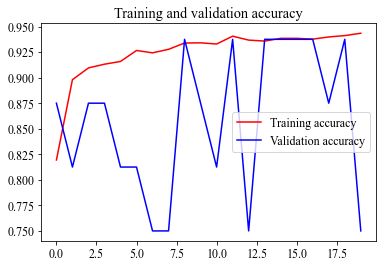

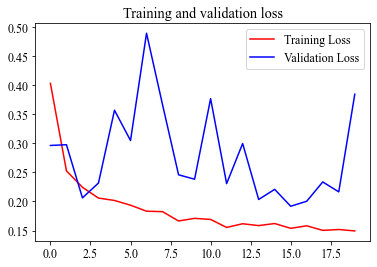

In [58]:
acc_num2 = history_Num2.history['accuracy']
val_num2 = history_Num2.history['val_accuracy']

loss_num2 = history_Num2.history['loss']
val_loss_num2 = history_Num2.history['val_loss']
epochs = range(len(acc_num2))

plt.plot(epochs, acc_num2, 'r', label='Training accuracy')
plt.plot(epochs, val_num2, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()


plt.plot(epochs, loss_num2, 'r', label='Training Loss')
plt.plot(epochs, val_loss_num2, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


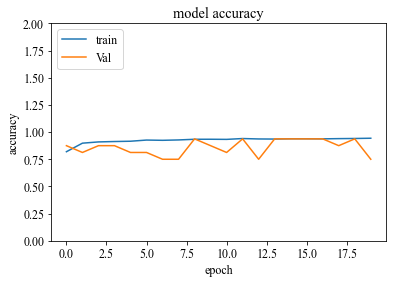

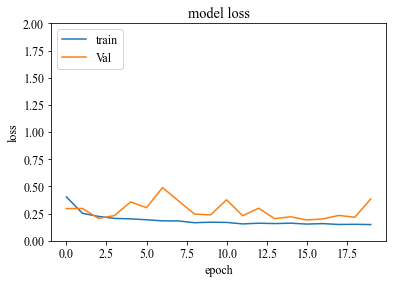

In [111]:
print(history_Num2.history.keys())
plt.plot(history_Num2.history['accuracy'])
plt.plot(history_Num2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.ylim(0,2)

plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')

plt.show()
plt.plot(history_Num2.history['loss'])
plt.plot(history_Num2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.ylim(0,2)
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')

plt.show()

In [126]:
result_model_Num2 = model2.evaluate_generator(test_generator_Num2, 156)
print('loss  :', result_model_Num2[0])
print('accuracy :', result_model_Num2[1])

C:\Users\natal\AppData\Local\Temp/ipykernel_13900/2311403331.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  result_model_Num2 = model2.evaluate_generator(test_generator_Num2, 156)


loss  : 0.2636033296585083
accuracy : 0.9054487347602844


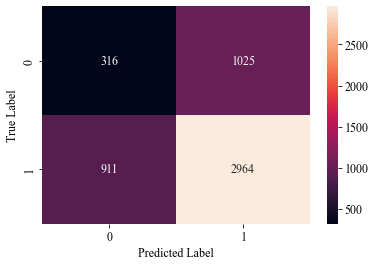

In [128]:
predictions_DenseNet121 = model2.predict(train_generator_Num2) 

y_pred = predictions_DenseNet121 > 0.5
y_true = train_generator_Num2.classes 

import seaborn as sns

font = {
    'family': 'Times New Roman',
    'size': 12
}
plt.rc('font', **font)
mat = confusion_matrix(y_true, y_pred)
sns.heatmap(mat, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [129]:
import sklearn.metrics

#Recall = TruePositives / (TruePositives + FalseNegatives)
#precision = TruePositives/(TruePositives+FalsePositives)

recall = sklearn.metrics.recall_score(y_true, y_pred, pos_label=1)
print(" The recall of model is:" ,recall)

precision = sklearn.metrics.precision_score(y_true, y_pred, pos_label=1)
print("The precision of the model is:" ,precision)

 The recall of model is: 0.7649032258064516
The precision of the model is: 0.7430433692654801


# part 3 - class weight

In [97]:
from tensorflow.keras import datasets, layers, models, losses, Model

In [98]:
train_generator_num3 = train_generator_num1
val_generator_num3   = val_generator_num1
test_generator_num3  = test_generator_num1

In [99]:
class_weight= {0:0.8, 1:0.2}

model_Num3 = tf.keras.applications.DenseNet121(weights='imagenet',
                                         include_top=False,
                                         input_shape=(180,180,3))

model_Num3.trainable=False #freeze the model layers
        
model_Num3.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_6 (ZeroPadding2  (None, 186, 186, 3)  0          ['input_5[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 90, 90, 64)   9408        ['zero_padding2d_6[0][0]']       
                                                                                        

In [100]:
for layer in model_Num3.layers:
      if layer.name == 'conv4_block17_2_conv' or layer.name == 'conv4_block17_1_conv ':
        layer.trainable = True

In [108]:
last_layer_train=model_Num3.get_layer('relu')
last_output = last_layer_train.output

x=tf.keras.layers.Flatten()(last_output)
x=tf.keras.layers.Dense(128,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(64,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(1,activation='sigmoid')(x)

model3=tf.keras.Model(model_Num3.input,x)

In [109]:
batch_size = 16
epochs = 20
lr = 1e-4
adam = tf.keras.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.95)

model3.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])


In [110]:
history_Num3=model3.fit(train_generator_num3,validation_data=val_generator_num3,epochs=epochs ,verbose=2,class_weight=class_weight)

Epoch 1/20
82/82 - 329s - loss: 0.1444 - accuracy: 0.7939 - val_loss: 0.1830 - val_accuracy: 0.8750 - 329s/epoch - 4s/step
Epoch 2/20
82/82 - 300s - loss: 0.1027 - accuracy: 0.8652 - val_loss: 0.2287 - val_accuracy: 0.8750 - 300s/epoch - 4s/step
Epoch 3/20
82/82 - 299s - loss: 0.0940 - accuracy: 0.8752 - val_loss: 0.3690 - val_accuracy: 0.8750 - 299s/epoch - 4s/step
Epoch 4/20
82/82 - 300s - loss: 0.0863 - accuracy: 0.8869 - val_loss: 0.2468 - val_accuracy: 0.8750 - 300s/epoch - 4s/step
Epoch 5/20
82/82 - 298s - loss: 0.0824 - accuracy: 0.8926 - val_loss: 0.2365 - val_accuracy: 0.8750 - 298s/epoch - 4s/step
Epoch 6/20
82/82 - 2093s - loss: 0.0776 - accuracy: 0.8990 - val_loss: 0.3304 - val_accuracy: 0.9375 - 2093s/epoch - 26s/step
Epoch 7/20
82/82 - 297s - loss: 0.0760 - accuracy: 0.9038 - val_loss: 0.3098 - val_accuracy: 0.9375 - 297s/epoch - 4s/step
Epoch 8/20
82/82 - 306s - loss: 0.0692 - accuracy: 0.9093 - val_loss: 0.2658 - val_accuracy: 0.8125 - 306s/epoch - 4s/step
Epoch 9/20
82

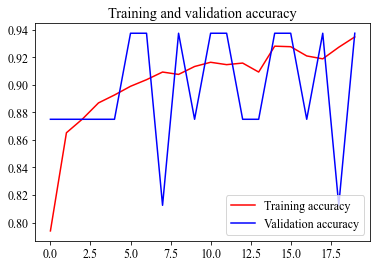

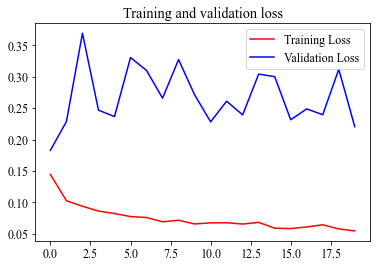

In [112]:
acc_num3 = history_Num3.history['accuracy']
val_num3 = history_Num3.history['val_accuracy']


loss_num3 = history_Num3.history['loss']
val_loss_num3 = history_Num3.history['val_loss']
epochs = range(len(acc_num3))

plt.plot(epochs, acc_num3, 'r', label='Training accuracy')
plt.plot(epochs, val_num3, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()


plt.plot(epochs, loss_num3, 'r', label='Training Loss')
plt.plot(epochs, val_loss_num3, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


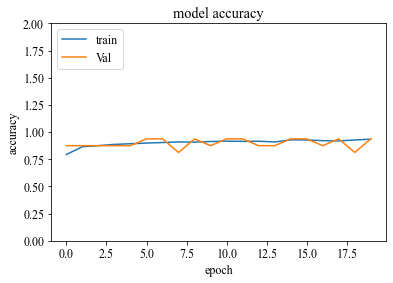

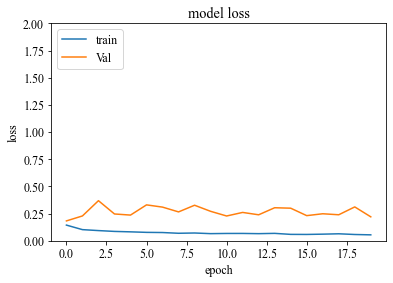

In [113]:
print(history_Num3.history.keys())
plt.plot(history_Num3.history['accuracy'])
plt.plot(history_Num3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.ylim(0,2)

plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')

plt.show()
# summarize history for loss
plt.plot(history_Num3.history['loss'])
plt.plot(history_Num3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.ylim(0,2)
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')

plt.show()

In [114]:
result_num3 = model3.evaluate_generator(test_generator_num3, 624)
print('loss  :', result_num3[0])
print('Recall :', result_num3[1])

C:\Users\natal\AppData\Local\Temp/ipykernel_13900/2346092822.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  result_num3 = model3.evaluate_generator(test_generator_num3, 624)


loss  : 0.3379270136356354
Recall : 0.8653846383094788


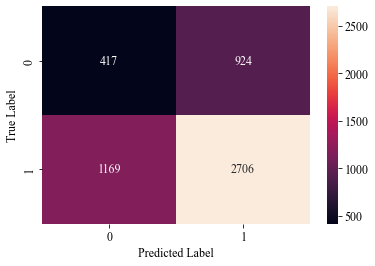

In [115]:
predictions_ResNet50 = model3.predict(train_generator_num3) 

y_pred = predictions_ResNet50 > 0.5
y_true = train_generator_num3.classes 

import seaborn as sns

font = {
    'family': 'Times New Roman',
    'size': 12
}
plt.rc('font', **font)
mat = confusion_matrix(y_true, y_pred)
sns.heatmap(mat, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [116]:
import sklearn.metrics

#Recall = TruePositives / (TruePositives + FalseNegatives)
#precision = TruePositives/(TruePositives+FalsePositives)

recall = sklearn.metrics.recall_score(y_true, y_pred, pos_label=1)
print(" The recall of model is:" ,recall)

precision = sklearn.metrics.precision_score(y_true, y_pred, pos_label=1)
print("The precision of the model is:" ,precision)

 The recall of model is: 0.6983225806451613
The precision of the model is: 0.7454545454545455
